In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  

In [7]:
text_data = list(df.columns)
text_data

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [8]:
def clean_text(text):
    return text.lower().strip()

cleaned_words = [clean_text(word) for word in text_data]
cleaned_words

['time',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'amount',
 'class']

In [9]:
word_freq = Counter(cleaned_words)
word_freq

Counter({'time': 1,
         'v1': 1,
         'v2': 1,
         'v3': 1,
         'v4': 1,
         'v5': 1,
         'v6': 1,
         'v7': 1,
         'v8': 1,
         'v9': 1,
         'v10': 1,
         'v11': 1,
         'v12': 1,
         'v13': 1,
         'v14': 1,
         'v15': 1,
         'v16': 1,
         'v17': 1,
         'v18': 1,
         'v19': 1,
         'v20': 1,
         'v21': 1,
         'v22': 1,
         'v23': 1,
         'v24': 1,
         'v25': 1,
         'v26': 1,
         'v27': 1,
         'v28': 1,
         'amount': 1,
         'class': 1})

In [10]:
def autocomplete(prefix, top_n=5):
    prefix = prefix.lower()
    matches = [w for w in word_freq if w.startswith(prefix)]
    return sorted(matches, key=lambda w: word_freq[w], reverse=True)[:top_n]

In [11]:
autocomplete("v")

['v1', 'v2', 'v3', 'v4', 'v5']

In [12]:
autocomplete("am")

['amount']

In [13]:
def autocorrect(word):
    word = word.lower()
    candidates = list(word_freq.keys())
    return min(candidates, key=lambda w: abs(len(w) - len(word)))

In [14]:
autocorrect("amunt")

'class'

In [15]:
autocorrect("clas")


'time'

In [16]:
correct = 0
total = len(cleaned_words)

for word in cleaned_words:
    if autocorrect(word) == word:
        correct += 1

accuracy = correct / total
accuracy

0.16129032258064516

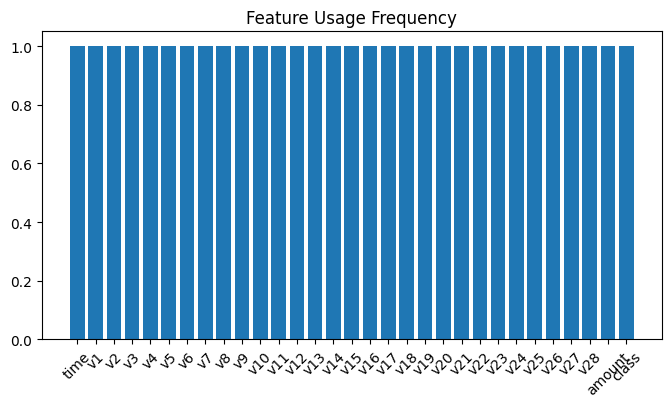

In [17]:
words, freq = zip(*word_freq.items())

plt.figure(figsize=(8,4))
plt.bar(words, freq)
plt.xticks(rotation=45)
plt.title("Feature Usage Frequency")
plt.show()

STEP 12: Final Conclusion
 Insights

Even non-text datasets can support autocomplete logic

Feature-level autocomplete improves analyst productivity

Simple algorithms are fast and effective for structured data

 Conclusion

Autocomplete and autocorrect techniques can enhance usability in analytical tools by reducing typing effort and improving accuracy, even when applied to structured numerical datasets.